In [1]:
import cv2
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from pygame import mixer
import time
import matplotlib.pyplot as plt
from tkinter import *
import tkinter.messagebox
from PIL import ImageTk as itk
from PIL import Image


pygame 2.5.0 (SDL 2.28.0, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
mixer.init()
sound = mixer.Sound(r'C:\Users\HP\Downloads\DROWSINESS DETECTION\alarm.wav')

In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
model=load_model("C:\\Users\\HP\\Downloads\DROWSINESS DETECTION\models\model.h5")

In [4]:
lbl=['Close', 'Open']

# Checking the model on Random images

1/1 [==============================] - 1s 1s/step
close eyes


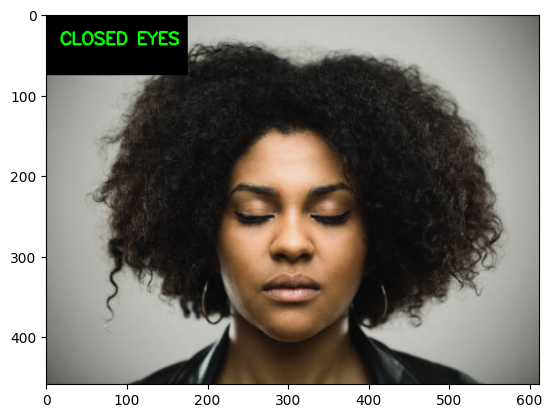

In [5]:
img=cv2.imread(r'C:\Users\HP\Downloads\DROWSINESS DETECTION\imagess\im2.jpg')
font = cv2.FONT_HERSHEY_SIMPLEX
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,minNeighbors = 1,scaleFactor = 1.1)

for x,y,w,h in eyes:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=img[y:y+h, x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyes)==0:
        print("eyes are not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey: ey+eh, ex:ex +ew]
final_image=cv2.resize(eyes_roi,(80,80))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0
Predictions=model.predict(final_image)
if (Predictions[0][1]>0.50):
    print("open eyes")
    x1,y1,w1,h1=0,0,175,75
    cv2.rectangle(img,(x1, x1),(x1+w1,y1+h1),(0,0,0),-1)
    cv2.putText(img,'OPEN EYES',(x1 + int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
else:
    print("close eyes")
    x1,y1,w1,h1=0,0,175,75
    cv2.rectangle(img,(x1, x1),(x1+w1,y1+h1),(0,0,0),-1)
    cv2.putText(img,'CLOSED EYES',(x1 + int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
grey=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(grey)


In [6]:
root=Tk()
root.geometry("1200x700")
frame1=Frame(root,relief=RIDGE,borderwidth=2)
frame1.pack(fill=BOTH,expand=1)
root.title('Driver Camera')
root.resizable(False,False)
frame1.config(background='black')
label=Label(frame1,text="Driver Camera",bg='black',font=('Times 35 bold'),fg='blue')
label.pack(side=TOP)
im = Image.open(r"C:\Users\HP\Downloads\new1.jpg")
filename=itk.PhotoImage(im)
background_label=Label(frame1,image=filename)
background_label.pack(side=TOP)

In [7]:
def hel():
    help(cv2)
def Contri():
    tkinter.messagebox.showinfo("Contributer","GARIMA CHAUHAN ")
def anotherWin():
    tkinter.messagebox.showinfo("About","DRIVER CAM DETECTOR \n Made Using \n Opencv \n tensorflow.keras ")

In [8]:

menu=Menu(root)
root.config(menu=menu)

subm1=Menu(menu)
menu.add_cascade(label="Tools",menu=subm1)
subm1.add_command(label="Open CV Docs",command=hel)

subm2=Menu(menu)
menu.add_cascade(label="About",menu=subm2)
subm2.add_command(label="DRIVER DROWSINESS DETECTION",command=anotherWin)
subm2.add_command(label="Contributor",command=Contri)

In [9]:
def exit():
    exit()
def alert():
   mixer.init()
   alert=mixer.Sound(r'C:\Users\HP\Downloads\DROWSINESS DETECTION\alarm.wav')
   alert.play()
   time.sleep(0.1)
   alert.play() 

# Detecting Eyes are Closed or Open using webcam

In [ ]:
def detect():
    path = os.getcwd()
    cap=cv2.VideoCapture(0)  
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    score = 0
    while(True):
        ret, frame = cap.read()
        height,width = frame.shape[:2]

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray,minNeighbors = 3,scaleFactor = 1.1,minSize=(25,25))
        eyes = eye_cascade.detectMultiScale(gray,minNeighbors = 1,scaleFactor = 1.1)

        #cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )

        for (x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y) , (x+w,y+h) , (255,0,0) , 3 )

        for (x,y,w,h) in eyes:

            eye = frame[y:y+h,x:x+w]
            #eye = cv2.cvtColor(eye,cv2.COLOR_BGR2GRAY)
            eye = cv2.resize(eye,(80,80))
            eye = eye/255
            eye = eye.reshape(80,80,3)
            eye = np.expand_dims(eye,axis=0)
            prediction = model.predict(eye)
            print(prediction)
           #Condition for Close
            if prediction[0][0]>0.30:
                cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.FONT_HERSHEY_SIMPLEX)
                cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.FONT_HERSHEY_SIMPLEX)
                score=score+1
                #print("Close Eyes")
                if(score > 5):
                    try:
                        sound.play()
                        time.sleep(0.2)
                        x1,y1,w1,h1=0,0,175,75
                        cv2.rectangle(frame,(x1, x1),(x1+w1,y1+h1),(0,0,0),-1)
                        cv2.putText(frame,'Sleep Alert!!!',(x1 + int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
                    except:  # isplaying = False
                        pass

            #Condition for Open
            elif prediction[0][1] > 0.70:
                score=0
                cv2.putText(frame,"Open",(10,height-20), font, 1,(255,255,255),1,cv2.FONT_HERSHEY_SIMPLEX)
                #print("Open Eyes")
                cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.FONT_HERSHEY_SIMPLEX)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    
but2=Button(frame1,padx=5,pady=5,width=39,bg='black',fg='blue',relief=GROOVE,command=detect,text='Detect',font=('helvetica 15 bold'))
but2.place(x=350,y=176)
but5=Button(frame1,padx=5,pady=5,width=5,bg='black',fg='blue',relief=GROOVE,text='EXIT',command=exit,font=('helvetica 15 bold'))
but5.place(x=350,y=250)
root.mainloop()

1/1 [==============================] - 0s 39ms/step
[[0.00130438 0.9986957 ]]
1/1 [==============================] - 0s 39ms/step
[[4.7262267e-05 9.9995279e-01]]


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_8384\2636623090.py", line 53, in detect
    cv2.imshow('frame',frame)
cv2.error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'



1/1 [==============================] - 0s 35ms/step
[[8.5316635e-05 9.9991465e-01]]
1/1 [==============================] - 0s 34ms/step
[[5.772455e-04 9.994228e-01]]
1/1 [==============================] - 0s 36ms/step
[[0.5236695  0.47633055]]


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_8384\2636623090.py", line 53, in detect
    cv2.imshow('frame',frame)
cv2.error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'



1/1 [==============================] - 0s 35ms/step
[[1.0805264e-04 9.9989188e-01]]
1/1 [==============================] - 0s 44ms/step
[[0.00969675 0.9903032 ]]
1/1 [==============================] - 0s 50ms/step
[[0.69874483 0.3012552 ]]
1/1 [==============================] - 0s 39ms/step
[[0.18389678 0.8161033 ]]


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_8384\2636623090.py", line 53, in detect
    cv2.imshow('frame',frame)
cv2.error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'



#### 